In [42]:
import pandas as pd
import numpy as np
import json
import os
from glob import glob

In [16]:
def get_json(path):
    with open(path) as f:
        dic = json.load(f)

    return dic

In [17]:
val_dir = os.path.join('/data', 'sub_KSL', 'Validation')
keypoint_dir = os.path.join(val_dir, 'keypoint')

In [26]:
df_info = pd.read_csv(os.path.join(val_dir, 'info.csv'))
df_info

video_name  duration label  start    end
0     NIA_SL_SEN0715_REAL18_F.mp4     4.800     곳  2.616  3.462
1     NIA_SL_SEN1331_REAL18_F.mp4     6.200     곳  3.892  4.191
2     NIA_SL_SEN1765_REAL18_F.mp4     7.200     곳  3.411  4.030
3     NIA_SL_SEN1666_REAL18_F.mp4     6.267     곳  4.489  5.315
4     NIA_SL_SEN1506_REAL18_F.mp4     6.800     곳  4.686  5.350
...                           ...       ...   ...    ...    ...
5614  NIA_SL_SEN0566_REAL18_F.mp4     5.950    유턴  2.286  3.557
5615  NIA_SL_SEN1908_REAL18_F.mp4     4.400    유턴  1.025  2.162
5616  NIA_SL_SEN0562_REAL18_F.mp4     5.284    유턴  1.782  2.719
5617  NIA_SL_SEN1910_REAL18_F.mp4     4.900    유턴  1.711  2.669
5618  NIA_SL_SEN1916_REAL18_F.mp4     4.700    유턴  1.869  2.404

[5619 rows x 5 columns]

In [27]:
df_info[df_info['video_name'] == 'NIA_SL_SEN0834_REAL18_F.mp4']

video_name  duration label  start    end
1037  NIA_SL_SEN0834_REAL18_F.mp4       5.2   내리다  2.349  3.760
4627  NIA_SL_SEN0834_REAL18_F.mp4       5.2    시청  1.201  2.136

In [43]:
with open(os.path.join(val_dir, 'info_sample.json')) as f:
    val_info = json.load(f)
    
df_info = pd.DataFrame(val_info)
df_info
len(df_info['video_name'].unique())

1912

In [44]:
df_info

video_name   fps label  duration_frame  global_frame   
0       NIA_SL_SEN0715_REAL18_F.mp4  30.0     곳              25            78  \
1       NIA_SL_SEN0715_REAL18_F.mp4  30.0     곳              25            79   
2       NIA_SL_SEN0715_REAL18_F.mp4  30.0     곳              25            80   
3       NIA_SL_SEN0715_REAL18_F.mp4  30.0     곳              25            81   
4       NIA_SL_SEN0715_REAL18_F.mp4  30.0     곳              25            82   
...                             ...   ...   ...             ...           ...   
125346  NIA_SL_SEN1916_REAL18_F.mp4  30.0    유턴              16            67   
125347  NIA_SL_SEN1916_REAL18_F.mp4  30.0    유턴              16            68   
125348  NIA_SL_SEN1916_REAL18_F.mp4  30.0    유턴              16            69   
125349  NIA_SL_SEN1916_REAL18_F.mp4  30.0    유턴              16            70   
125350  NIA_SL_SEN1916_REAL18_F.mp4  30.0    유턴              16            71   

        local_frame  
0                 0  
1                 1  
2                 2  
3                 3  
4                 4  
...             ...  
125346           11  
125347           12  
125348           13  
125349           14  
125350           15  

[125351 rows x 6 columns]

In [45]:
start_points = df_info[df_info['local_frame'] == 0].copy()
start_points[start_points['video_name'] == 'NIA_SL_SEN0834_REAL18_F.mp4']

video_name   fps label  duration_frame  global_frame   
19585   NIA_SL_SEN0834_REAL18_F.mp4  30.0   내리다              42            70  \
100265  NIA_SL_SEN0834_REAL18_F.mp4  30.0    시청              28            36   

        local_frame  
19585             0  
100265            0

In [48]:
df_info.drop([100265], axis=0, inplace=True)
df_info

video_name   fps label  duration_frame  global_frame   
0       NIA_SL_SEN0715_REAL18_F.mp4  30.0     곳              25            78  \
1       NIA_SL_SEN0715_REAL18_F.mp4  30.0     곳              25            79   
2       NIA_SL_SEN0715_REAL18_F.mp4  30.0     곳              25            80   
3       NIA_SL_SEN0715_REAL18_F.mp4  30.0     곳              25            81   
4       NIA_SL_SEN0715_REAL18_F.mp4  30.0     곳              25            82   
...                             ...   ...   ...             ...           ...   
125346  NIA_SL_SEN1916_REAL18_F.mp4  30.0    유턴              16            67   
125347  NIA_SL_SEN1916_REAL18_F.mp4  30.0    유턴              16            68   
125348  NIA_SL_SEN1916_REAL18_F.mp4  30.0    유턴              16            69   
125349  NIA_SL_SEN1916_REAL18_F.mp4  30.0    유턴              16            70   
125350  NIA_SL_SEN1916_REAL18_F.mp4  30.0    유턴              16            71   

        local_frame  
0                 0  
1                 1  
2                 2  
3                 3  
4                 4  
...             ...  
125346           11  
125347           12  
125348           13  
125349           14  
125350           15  

[125350 rows x 6 columns]

In [82]:
cnt = 0
for i in range(100266, 100293, 1):
    print(i)

    df_info.loc[i, 'local_frame'] = cnt
    cnt += 1

100266
100267
100268
100269
100270
100271
100272
100273
100274
100275
100276
100277
100278
100279
100280
100281
100282
100283
100284
100285
100286
100287
100288
100289
100290
100291
100292


In [83]:
df_info[(df_info['video_name'] == 'NIA_SL_SEN0834_REAL18_F.mp4') & (df_info['label'] == '시청')]['local_frame']

100266     0
100267     1
100268     2
100269     3
100270     4
100271     5
100272     6
100273     7
100274     8
100275     9
100276    10
100277    11
100278    12
100279    13
100280    14
100281    15
100282    16
100283    17
100284    18
100285    19
100286    20
100287    21
100288    22
100289    23
100290    24
100291    25
100292    26
Name: local_frame, dtype: int64

In [85]:
df_info.reset_index(inplace=True, drop=True)
df_info

video_name   fps label  duration_frame  global_frame   
0       NIA_SL_SEN0715_REAL18_F.mp4  30.0     곳              25            78  \
1       NIA_SL_SEN0715_REAL18_F.mp4  30.0     곳              25            79   
2       NIA_SL_SEN0715_REAL18_F.mp4  30.0     곳              25            80   
3       NIA_SL_SEN0715_REAL18_F.mp4  30.0     곳              25            81   
4       NIA_SL_SEN0715_REAL18_F.mp4  30.0     곳              25            82   
...                             ...   ...   ...             ...           ...   
125345  NIA_SL_SEN1916_REAL18_F.mp4  30.0    유턴              16            67   
125346  NIA_SL_SEN1916_REAL18_F.mp4  30.0    유턴              16            68   
125347  NIA_SL_SEN1916_REAL18_F.mp4  30.0    유턴              16            69   
125348  NIA_SL_SEN1916_REAL18_F.mp4  30.0    유턴              16            70   
125349  NIA_SL_SEN1916_REAL18_F.mp4  30.0    유턴              16            71   

        local_frame  
0                 0  
1                 1  
2                 2  
3                 3  
4                 4  
...             ...  
125345           11  
125346           12  
125347           13  
125348           14  
125349           15  

[125350 rows x 6 columns]

In [ ]:
results = df_info.to_json(orient="table")
results

In [91]:
df_info.to_csv(os.path.join(val_dir, 'info_sample.csv'), index=False)

In [86]:
val_info

{'video_name': ['NIA_SL_SEN0715_REAL18_F.mp4',
  'NIA_SL_SEN0715_REAL18_F.mp4',
  'NIA_SL_SEN0715_REAL18_F.mp4',
  'NIA_SL_SEN0715_REAL18_F.mp4',
  'NIA_SL_SEN0715_REAL18_F.mp4',
  'NIA_SL_SEN0715_REAL18_F.mp4',
  'NIA_SL_SEN0715_REAL18_F.mp4',
  'NIA_SL_SEN0715_REAL18_F.mp4',
  'NIA_SL_SEN0715_REAL18_F.mp4',
  'NIA_SL_SEN0715_REAL18_F.mp4',
  'NIA_SL_SEN0715_REAL18_F.mp4',
  'NIA_SL_SEN0715_REAL18_F.mp4',
  'NIA_SL_SEN0715_REAL18_F.mp4',
  'NIA_SL_SEN0715_REAL18_F.mp4',
  'NIA_SL_SEN0715_REAL18_F.mp4',
  'NIA_SL_SEN0715_REAL18_F.mp4',
  'NIA_SL_SEN0715_REAL18_F.mp4',
  'NIA_SL_SEN0715_REAL18_F.mp4',
  'NIA_SL_SEN0715_REAL18_F.mp4',
  'NIA_SL_SEN0715_REAL18_F.mp4',
  'NIA_SL_SEN0715_REAL18_F.mp4',
  'NIA_SL_SEN0715_REAL18_F.mp4',
  'NIA_SL_SEN0715_REAL18_F.mp4',
  'NIA_SL_SEN0715_REAL18_F.mp4',
  'NIA_SL_SEN0715_REAL18_F.mp4',
  'NIA_SL_SEN1331_REAL18_F.mp4',
  'NIA_SL_SEN1331_REAL18_F.mp4',
  'NIA_SL_SEN1331_REAL18_F.mp4',
  'NIA_SL_SEN1331_REAL18_F.mp4',
  'NIA_SL_SEN1331_REAL18_F.mp

In [46]:
# get_valid_keypoint('NIA_SL_SEN0834_REAL18_F', 36)
for i in range(37, 63, 1):
    get_valid_keypoint('NIA_SL_SEN0834_REAL18_F', i)

In [35]:
def get_valid_keypoint(video_name, num_frame):
    keypoint_paths = glob(os.path.join(keypoint_dir, video_name, '{}_*0{}_keypoints.json'.format(video_name, num_frame)))
    if not len(keypoint_paths) == 1:
        if video_name in os.listdir(keypoint_dir):
            if len(keypoint_paths) > 1:
                print(os.listdir(os.path.join(keypoint_dir, video_name)))
        raise Error
        
    dic = get_json(keypoint_paths[0])
    people_dic = dic['people']
    
    pose_2d = people_dic['pose_keypoints_2d']
    hand_left_2d = people_dic['hand_left_keypoints_2d']
    hand_right_2d = people_dic['hand_right_keypoints_2d']
    
    return pose_2d, hand_left_2d, hand_right_2d

In [153]:
def separate_keypoint(pose, left_hd, right_hd):
    neck_idx = 1
    right_shoulder_idx = 2
    right_elbow_idx = 3
    right_wrist_dix = 4
    left_shoulder_idx = 5
    left_elbow_idx = 6
    left_wrist_dix = 7
    right_pelvis_idx = 9
    left_pelvis_idx = 12

    # get center of body
    center_ws = []
    center_hs = []
    for i in [neck_idx, right_pelvis_idx, left_pelvis_idx]:
        center_ws.append(pose[(i)*3:((i+1)*3)-1][0])
        center_hs.append(pose[(i)*3:((i+1)*3)-1][1])
        
    center_w = np.mean(center_ws)
    center_h = np.mean(center_hs)
    
    # center_w = 0.
    # center_h = 0.
    
    arm_ws = []
    arm_hs = []
    for j in [right_shoulder_idx, right_elbow_idx, right_wrist_dix, left_shoulder_idx, left_elbow_idx, left_wrist_dix]:
        arm_ws.append(pose[(j)*3:((j+1)*3)-1][0] - center_w)
        arm_hs.append(pose[(j)*3:((j+1)*3)-1][1] - center_h)

    left_ws = []
    left_hs = []
    for k in range(int(len(left_hd)/3)):
        left_ws.append(left_hd[k*3:((k+1)*3)-1][0] - center_w)
        left_hs.append(left_hd[k*3:((k+1)*3)-1][1] - center_h)
        
    right_ws = []
    right_hs = []
    for z in range(int(len(right_hd)/3)):
        right_ws.append(right_hd[z*3:((z+1)*3)-1][0] - center_w)
        right_hs.append(right_hd[z*3:((z+1)*3)-1][1] - center_h)
        
    w_max, w_min = np.max(arm_ws + left_ws + right_ws), np.min(arm_ws + left_ws + right_ws)
    h_max, h_min = np.max(arm_hs + left_hs + right_hs), np.min(arm_hs + left_hs + right_hs)
    
    arm_ws = (arm_ws - w_min) / (w_max - w_min)
    arm_hs = (arm_hs - h_min) / (h_max - h_min)
    
    left_ws = (left_ws - w_min) / (w_max - w_min)
    left_hs = (left_hs - h_min) / (h_max - h_min)
    
    right_ws = (right_ws - w_min) / (w_max - w_min)
    right_hs = (right_hs - h_min) / (h_max - h_min)
    
    return arm_ws, arm_hs


                        video_name   fps label  duration_frame  global_frame   
84427  NIA_SL_SEN0684_REAL18_F.mp4  30.0    샛길              31            47  \
84428  NIA_SL_SEN0684_REAL18_F.mp4  30.0    샛길              31            48   
84429  NIA_SL_SEN0684_REAL18_F.mp4  30.0    샛길              31            49   
84430  NIA_SL_SEN0684_REAL18_F.mp4  30.0    샛길              31            50   
84431  NIA_SL_SEN0684_REAL18_F.mp4  30.0    샛길              31            51   
84432  NIA_SL_SEN0684_REAL18_F.mp4  30.0    샛길              31            52   
84433  NIA_SL_SEN0684_REAL18_F.mp4  30.0    샛길              31            53   
84434  NIA_SL_SEN0684_REAL18_F.mp4  30.0    샛길              31            54   
84435  NIA_SL_SEN0684_REAL18_F.mp4  30.0    샛길              31            55   
84436  NIA_SL_SEN0684_REAL18_F.mp4  30.0    샛길              31            56   
84437  NIA_SL_SEN0684_REAL18_F.mp4  30.0    샛길              31            57   
84438  NIA_SL_SEN0684_REAL18_F.mp4  30.0

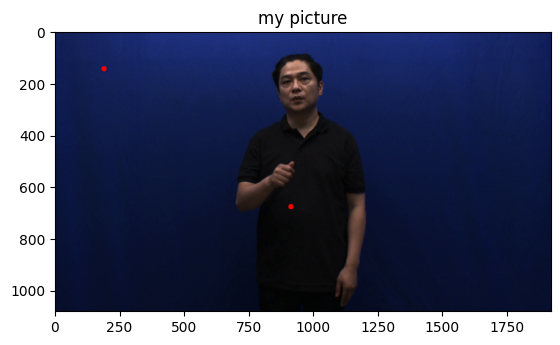

25.0
[-156.62400000000014, -225.3130000000001, -115.4860000000001, 160.2489999999999, 210.399, 189.68899999999996]
[0.15764771 0.         0.25206329 0.88490104 1.         0.9524686 ]
0
-156.62400000000014 -337.16633333333334
1
-225.3130000000001 -115.46833333333336
2
-115.4860000000001 -220.4033333333333
3
160.2489999999999 -334.2253333333333
4
210.399 -89.94733333333329
5
189.68899999999996 145.45866666666666


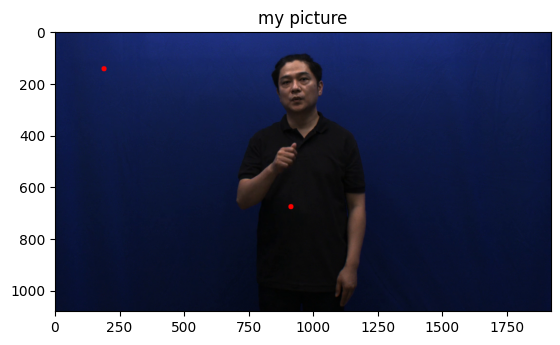

25.0
[-154.00833333333344, -218.82033333333345, -101.12833333333344, 160.90966666666657, 211.05966666666666, 190.31966666666665]
[0.15076766 0.         0.27377873 0.88333954 1.         0.95175398]
0
-154.00833333333344 -340.39766666666674
1
-218.82033333333345 -122.69766666666669
2
-101.12833333333344 -269.7906666666667
3
160.90966666666657 -334.5646666666667
4
211.05966666666666 -90.26566666666668
5
190.31966666666665 145.08433333333323


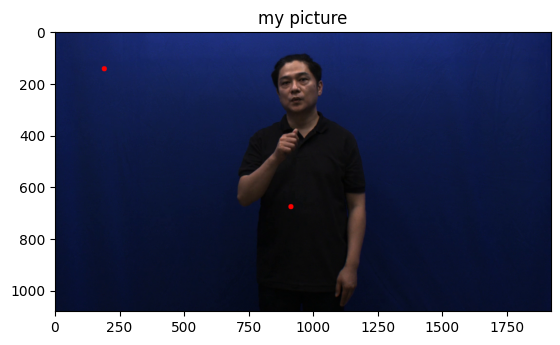

25.0
[-152.07999999999993, -217.86699999999996, -96.21899999999994, 159.937, 211.01699999999994, 189.3370000000001]
[0.15339113 0.         0.28363847 0.8809002  1.         0.9494502 ]
0
-152.07999999999993 -340.0993333333334
1
-217.86699999999996 -133.16233333333344
2
-96.21899999999994 -294.9763333333334
3
159.937 -333.2623333333334
4
211.01699999999994 -88.92433333333338
5
189.3370000000001 147.38066666666657


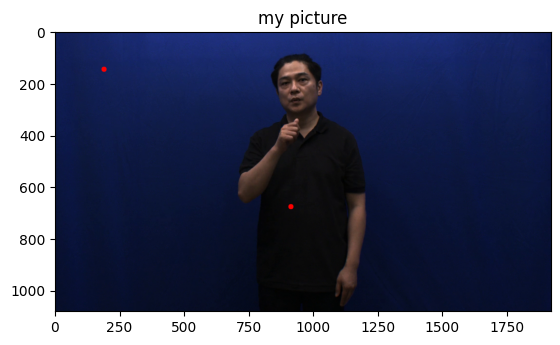

25.0
[-150.15233333333344, -216.9133333333334, -91.31033333333346, 158.96366666666654, 210.97366666666653, 188.36366666666663]
[0.15602484 0.         0.29354245 0.87844922 1.         0.94715895]
0
-150.15233333333344 -339.8013333333333
1
-216.9133333333334 -143.62733333333324
2
-91.31033333333346 -320.16233333333327
3
158.96366666666654 -331.96033333333327
4
210.97366666666653 -87.58333333333326
5
188.36366666666663 149.67666666666673


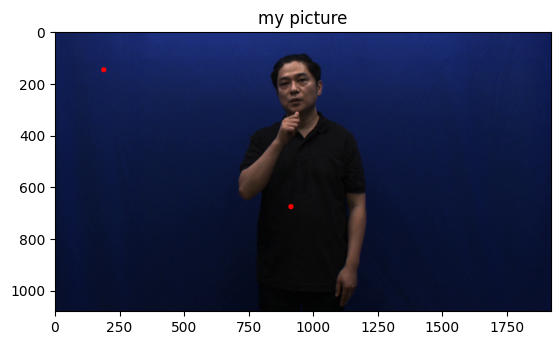

25.0
[-148.22466666666662, -215.95966666666664, -86.40066666666667, 157.9903333333333, 210.94033333333334, 187.3903333333334]
[0.15866714 0.         0.30348794 0.87596627 1.         0.94483486]
0
-148.22466666666662 -339.50266666666664
1
-215.95966666666664 -154.09266666666667
2
-86.40066666666667 -345.34866666666665
3
157.9903333333333 -330.65866666666665
4
210.94033333333334 -86.24166666666667
5
187.3903333333334 151.97333333333336


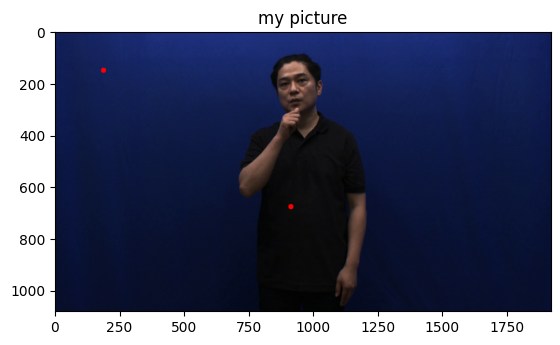

25.0
[-147.54966666666667, -215.26866666666672, -84.77966666666669, 158.6203333333333, 213.53033333333337, 187.03033333333337]
[0.15792714 0.         0.30431274 0.87194466 1.         0.93819948]
0
-147.54966666666667 -339.14433333333335
1
-215.26866666666672 -154.74433333333332
2
-84.77966666666669 -345.98733333333337
3
158.6203333333333 -331.2803333333334
4
213.53033333333337 -84.93633333333332
5
187.03033333333337 150.38166666666666


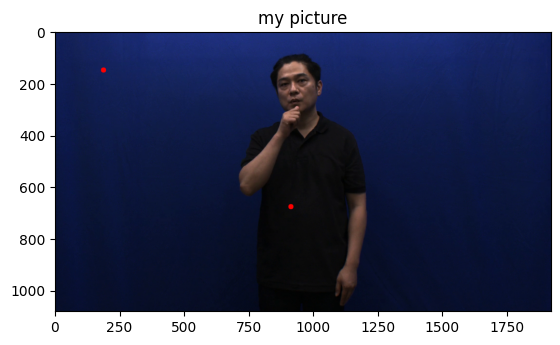

25.0
[-146.8746666666667, -214.5766666666667, -83.1586666666667, 159.26033333333328, 216.1303333333334, 186.68033333333335]
[0.15718807 0.         0.30512158 0.86796128 1.         0.93162405]
0
-146.8746666666667 -338.786
1
-214.5766666666667 -155.39499999999998
2
-83.1586666666667 -346.627
3
159.26033333333328 -331.901
4
216.1303333333334 -83.63
5
186.68033333333335 148.78999999999996


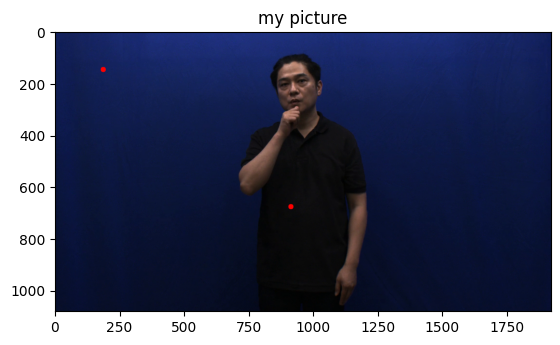

25.0
[-146.19999999999993, -213.885, -81.53800000000001, 159.89999999999998, 218.7299999999999, 186.33000000000004]
[0.15645551 0.         0.30592328 0.86401304 1.         0.92510662]
0
-146.19999999999993 -338.4273333333334
1
-213.885 -156.04633333333345
2
-81.53800000000001 -347.26533333333344
3
159.89999999999998 -332.52233333333345
4
218.7299999999999 -82.32433333333347
5
186.33000000000004 147.19766666666658


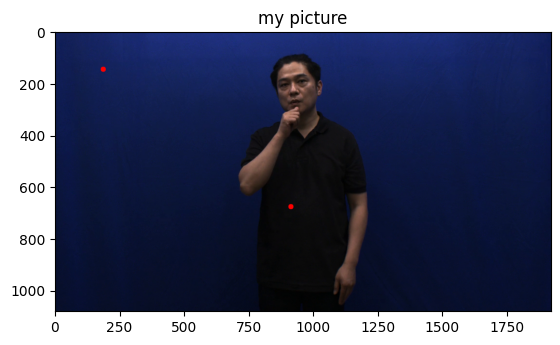

25.0
[-147.50799999999992, -217.15699999999993, -86.7299999999999, 160.54500000000007, 224.31500000000005, 175.2550000000001]
[0.15776538 0.         0.29543663 0.85555143 1.         0.88887177]
0
-147.50799999999992 -335.1786666666667
1
-217.15699999999993 -143.91466666666668
2
-86.7299999999999 -328.3296666666667
3
160.54500000000007 -329.2716666666667
4
224.31500000000005 -83.9856666666667
5
175.2550000000001 129.8513333333333


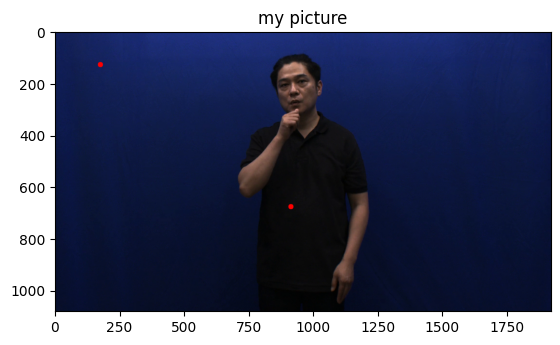

25.0
[-148.81966666666665, -220.43166666666662, -91.92466666666667, 161.19633333333343, 229.88633333333325, 164.17633333333345]
[0.1590254  0.         0.28536945 0.84746335 1.         0.85408089]
0
-148.81966666666665 -331.9303333333334
1
-220.43166666666662 -131.78233333333344
2
-91.92466666666667 -309.3943333333334
3
161.19633333333343 -326.0203333333334
4
229.88633333333325 -85.64733333333334
5
164.17633333333345 112.50566666666657


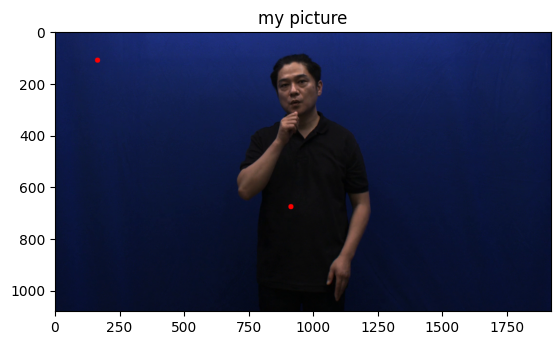

25.0
[-150.13066666666657, -223.7066666666666, -97.1196666666666, 161.8473333333335, 235.47733333333338, 153.0973333333335]
[0.16023206 0.         0.27567816 0.83965034 1.         0.82059479]
0
-150.13066666666657 -328.68266666666665
1
-223.7066666666666 -119.65066666666667
2
-97.1196666666666 -290.45866666666666
3
161.8473333333335 -322.76966666666664
4
235.47733333333338 -87.30866666666668
5
153.0973333333335 95.1593333333334


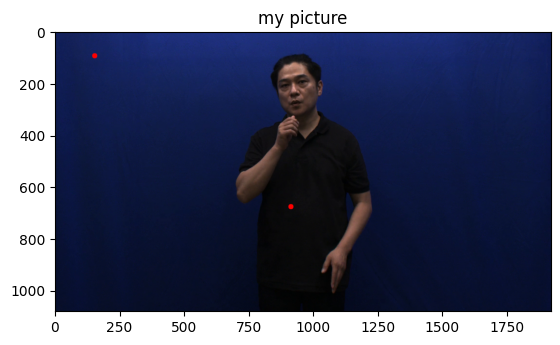

25.0
[-152.11133333333328, -230.5913333333333, -105.92233333333331, 160.85766666666677, 239.38766666666675, 144.21766666666667]
[0.16698618 0.         0.26526504 0.83290743 1.         0.79750159]
0
-152.11133333333328 -322.1583333333333
1
-230.5913333333333 -106.27033333333327
2
-105.92233333333331 -263.3093333333333
3
160.85766666666677 -321.14033333333333
4
239.38766666666675 -87.6103333333333
5
144.21766666666667 61.45766666666668


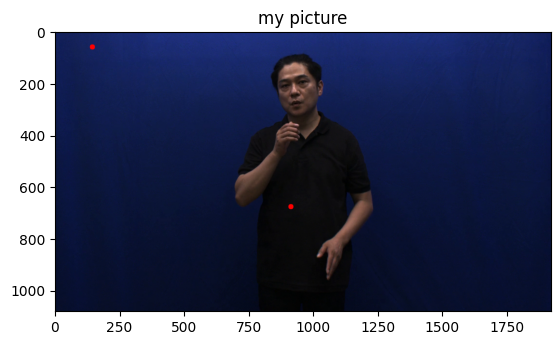

25.0
[-154.09199999999998, -237.476, -114.72500000000002, 159.87800000000004, 243.2979999999999, 135.34800000000007]
[0.173437   0.         0.25531955 0.82648812 1.         0.77546623]
0
-154.09199999999998 -315.6333333333334
1
-237.476 -92.88933333333341
2
-114.72500000000002 -236.1593333333334
3
159.87800000000004 -319.5103333333334
4
243.2979999999999 -87.91233333333344
5
135.34800000000007 27.75566666666657


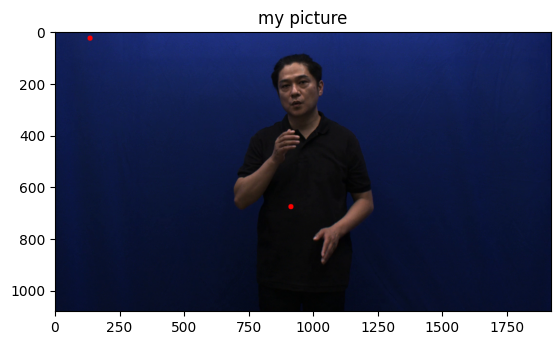

25.0
[-156.07566666666673, -244.36466666666672, -123.53166666666675, 158.8943333333333, 247.20433333333324, 126.47433333333322]
[0.17960653 0.         0.24581086 0.82035075 1.         0.75439867]
0
-156.07566666666673 -309.10900000000004
1
-244.36466666666672 -79.50900000000001
2
-123.53166666666675 -209.01
3
158.8943333333333 -317.88100000000003
4
247.20433333333324 -88.21400000000006
5
126.47433333333322 -5.946000000000026


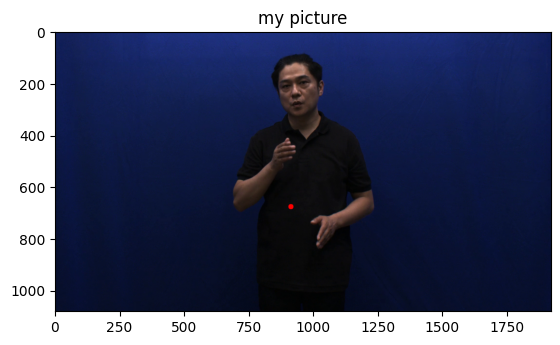

25.0
[-154.76066666666657, -244.0086666666666, -121.27066666666656, 160.20933333333346, 250.5193333333334, 121.89933333333352]
[0.18047108 0.         0.24819222 0.81738142 1.         0.73991361]
0
-154.76066666666657 -315.95733333333334
1
-244.0086666666666 -86.36633333333339
2
-121.27066666666656 -194.2883333333333
3
160.20933333333346 -325.69733333333335
4
250.5193333333334 -92.17033333333336
5
121.89933333333352 -37.3363333333333


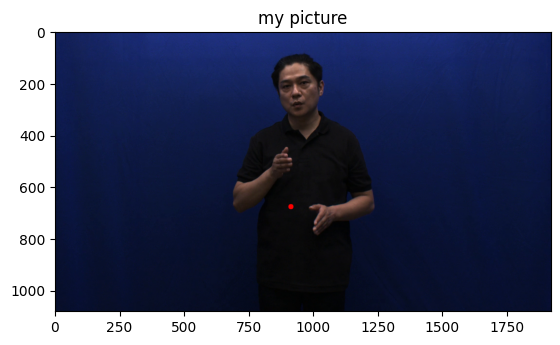

25.0
[-153.44466666666676, -243.65166666666676, -119.00966666666682, 161.53433333333328, 253.84433333333322, 117.33433333333323]
[0.18132206 0.         0.2505387  0.81445077 1.         0.72560583]
0
-153.44466666666676 -322.8049999999999
1
-243.65166666666676 -93.22399999999993
2
-119.00966666666682 -179.5669999999999
3
161.53433333333328 -333.5139999999999
4
253.84433333333322 -96.12699999999995
5
117.33433333333323 -68.72599999999989


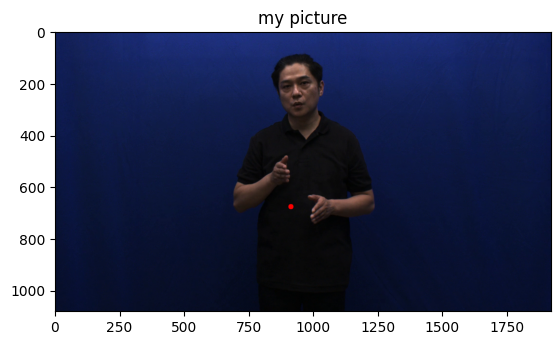

25.0
[-152.12900000000002, -243.29499999999996, -116.74800000000005, 162.85900000000004, 257.169, 112.76899999999989]
[0.18216295 0.         0.25285935 0.81155488 1.         0.71146776]
0
-152.12900000000002 -329.6533333333333
1
-243.29499999999996 -100.08233333333328
2
-116.74800000000005 -164.84533333333331
3
162.85900000000004 -341.3313333333333
4
257.169 -100.08333333333326
5
112.76899999999989 -100.11633333333327


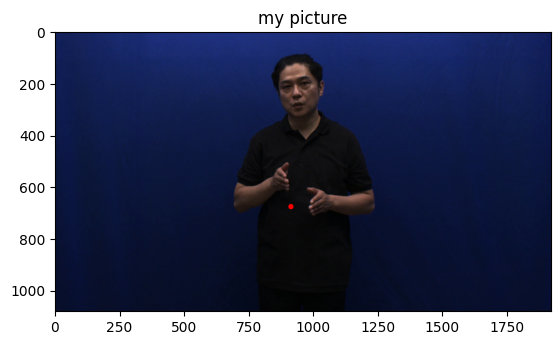

25.0
[-152.1343333333333, -243.33033333333333, -117.72633333333329, 162.83466666666675, 256.1546666666667, 109.81466666666677]
[0.18258006 0.         0.25146701 0.81316756 1.         0.70701823]
0
-152.1343333333333 -330.29599999999994
1
-243.33033333333333 -98.77499999999998
2
-117.72633333333329 -155.69299999999998
3
162.83466666666675 -340.05199999999996
4
256.1546666666667 -95.81799999999998
5
109.81466666666677 -110.51599999999996


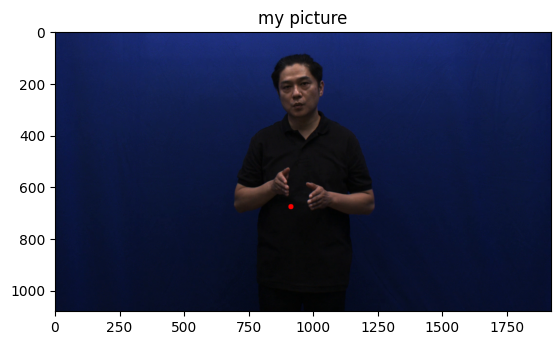

25.0
[-152.14300000000003, -243.36900000000003, -118.70800000000008, 162.817, 255.13699999999994, 106.87699999999995]
[0.1829988  0.         0.25006921 0.81480664 1.         0.70259134]
0
-152.14300000000003 -330.9389999999999
1
-243.36900000000003 -97.46799999999996
2
-118.70800000000008 -146.53999999999985
3
162.817 -338.7729999999999
4
255.13699999999994 -91.55199999999991
5
106.87699999999995 -120.91499999999985


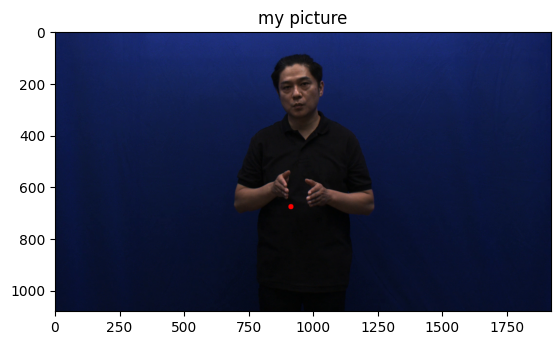

25.0
[-152.15233333333333, -243.4083333333333, -119.68933333333337, 162.7986666666667, 254.11866666666663, 103.92866666666657]
[0.18341919 0.         0.24866791 0.81645217 1.         0.69812694]
0
-152.15233333333333 -331.58233333333334
1
-243.4083333333333 -96.16033333333337
2
-119.68933333333337 -137.38733333333334
3
162.7986666666667 -337.49333333333334
4
254.11866666666663 -87.28633333333335
5
103.92866666666657 -131.31433333333337


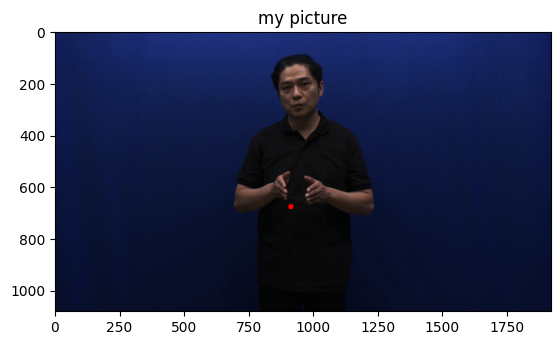

25.0
[-154.39333333333332, -243.72233333333327, -121.97833333333335, 161.53266666666673, 249.87266666666665, 100.69266666666681]
[0.18097631 0.         0.24664756 0.82102736 1.         0.69776841]
0
-154.39333333333332 -330.59299999999996
1
-243.72233333333327 -99.12599999999998
2
-121.97833333333335 -143.24199999999996
3
161.53266666666673 -337.465
4
249.87266666666665 -87.28499999999997
5
100.69266666666681 -139.255


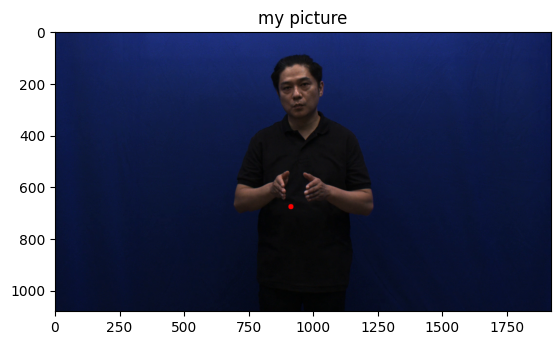

25.0
[-156.6346666666667, -244.03666666666663, -124.26666666666665, 160.26633333333336, 245.62633333333326, 97.46633333333341]
[0.17849419 0.         0.24459679 0.82567603 1.         0.69742456]
0
-156.6346666666667 -329.60300000000007
1
-244.03666666666663 -102.09100000000012
2
-124.26666666666665 -149.0970000000001
3
160.26633333333336 -337.43700000000007
4
245.62633333333326 -87.2840000000001
5
97.46633333333341 -147.19500000000005


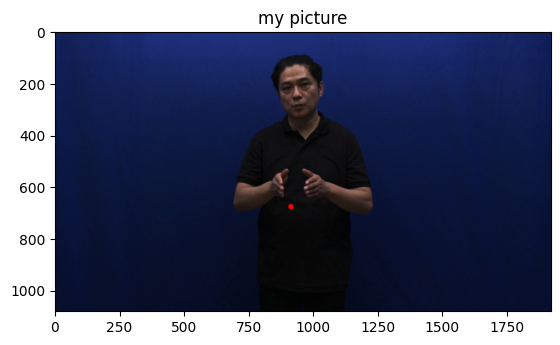

25.0
[-158.87599999999986, -244.35099999999989, -126.55499999999995, 159.0000000000001, 241.38, 94.24000000000012]
[0.17597189 0.         0.24251283 0.83039995 1.         0.69707513]
0
-158.87599999999986 -328.61300000000006
1
-244.35099999999989 -105.05600000000004
2
-126.55499999999995 -154.95100000000014
3
159.0000000000001 -337.4090000000001
4
241.38 -87.28300000000013
5
94.24000000000012 -155.1350000000001


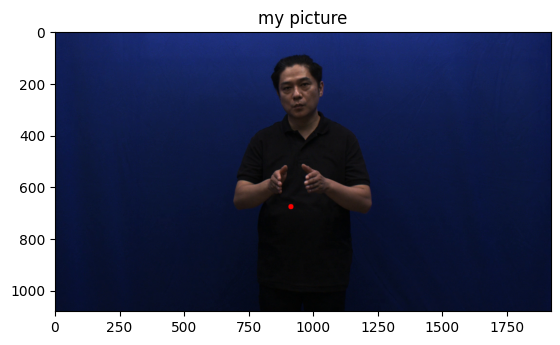

25.0
[-157.30466666666655, -244.68166666666662, -131.80966666666654, 156.70133333333342, 234.16133333333346, 92.89133333333348]
[0.18247526 0.         0.23571818 0.83823508 1.         0.70497637]
0
-157.30466666666655 -324.3906666666666
1
-244.68166666666662 -108.6486666666666
2
-131.80966666666654 -164.49766666666665
3
156.70133333333342 -331.20266666666663
4
234.16133333333346 -92.85266666666666
5
92.89133333333348 -165.5666666666666


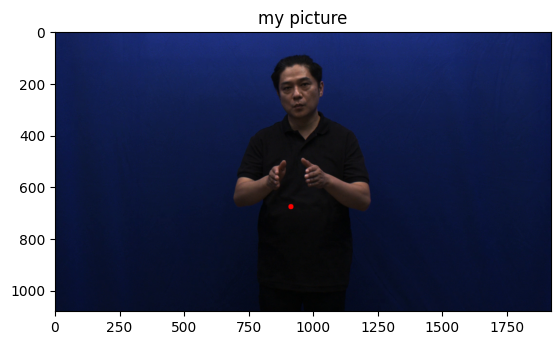

25.0
[-155.73366666666664, -245.01266666666663, -137.06466666666665, 154.40233333333333, 226.95233333333329, 91.55233333333342]
[0.18916445 0.         0.22872035 0.84628097 1.         0.71311432]
0
-155.73366666666664 -320.1676666666667
1
-245.01266666666663 -112.2406666666667
2
-137.06466666666665 -174.0436666666667
3
154.40233333333333 -324.9966666666667
4
226.95233333333329 -98.42166666666674
5
91.55233333333342 -175.99766666666676


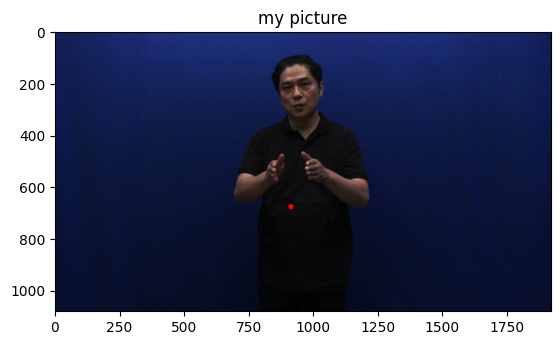

25.0
[-154.16533333333336, -245.3463333333333, -142.3223333333333, 152.1096666666666, 219.73966666666672, 90.20966666666675]
[0.19605191 0.         0.22151602 0.85458603 1.         0.72149237]
0
-154.16533333333336 -315.945
1
-245.3463333333333 -115.83299999999997
2
-142.3223333333333 -183.58999999999992
3
152.1096666666666 -318.78999999999996
4
219.73966666666672 -103.99099999999999
5
90.20966666666675 -186.42899999999997


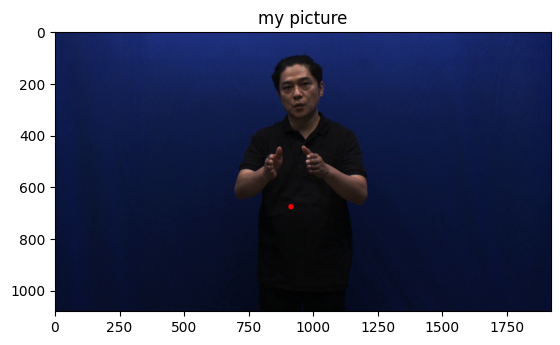

25.0
[-151.85699999999986, -243.97199999999987, -143.98599999999988, 153.38700000000006, 216.13700000000006, 96.41700000000003]
[0.20020256 0.         0.21730938 0.86361927 1.         0.73980079]
0
-151.85699999999986 -316.6496666666667
1
-243.97199999999987 -125.31066666666675
2
-143.98599999999988 -202.82566666666673
3
153.38700000000006 -317.5216666666667
4
216.13700000000006 -107.61266666666666
5
96.41700000000003 -190.06066666666675


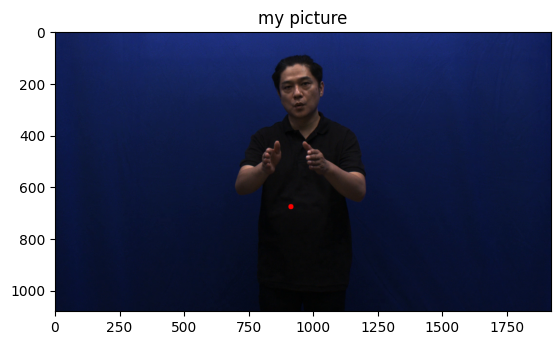

25.0
[-149.5483333333333, -242.5963333333333, -145.6493333333333, 154.66466666666668, 212.54466666666679, 102.6346666666667]
[0.20443775 0.         0.21300432 0.87283062 1.         0.75851439]
0
-149.5483333333333 -317.35466666666673
1
-242.5963333333333 -134.78766666666672
2
-145.6493333333333 -222.06066666666675
3
154.66466666666668 -316.25366666666673
4
212.54466666666679 -111.23466666666673
5
102.6346666666667 -193.6926666666667


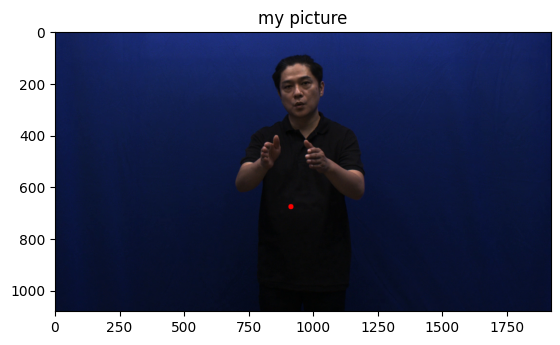

25.0
[-147.24299999999994, -241.2249999999999, -147.31599999999992, 155.9480000000001, 208.9480000000001, 108.84800000000018]
[0.20876863 0.         0.20860647 0.88226748 1.         0.77764104]
0
-147.24299999999994 -318.0593333333332
1
-241.2249999999999 -144.26533333333316
2
-147.31599999999992 -241.29633333333322
3
155.9480000000001 -314.9853333333332
4
208.9480000000001 -114.85633333333317
5
108.84800000000018 -197.32433333333324


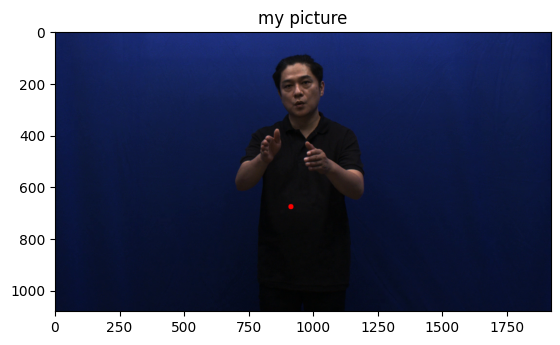

25.0
[-148.83033333333333, -241.87333333333333, -147.91533333333336, 155.33966666666663, 213.18966666666654, 114.10966666666661]
[0.2044618  0.         0.20647251 0.87287474 1.         0.78227191]
0
-148.83033333333333 -322.9010000000001
1
-241.87333333333333 -145.2360000000001
2
-147.91533333333336 -258.9520000000001
3
155.33966666666663 -318.8870000000001
4
213.18966666666654 -109.92700000000013
5
114.10966666666661 -180.59900000000005


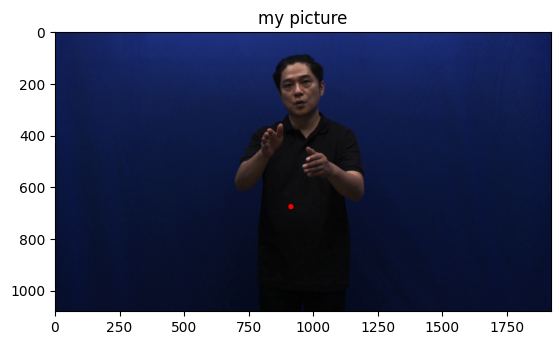

In [154]:


for i in range(len(start_points)):
    start_sample = start_points.iloc[4000]
    
    video_name = start_sample['video_name']
    num_frame = start_sample['global_frame']
    fps = start_sample['fps']
    label = start_sample['label']
    dur = start_sample['duration_frame']
    
    condi1 = (df_info['video_name'] == video_name)
    condi2 = (df_info['fps'] == fps)
    condi3 = (df_info['label'] == label)
    condi4 = (df_info['duration_frame'] == dur)
    
    df_total_data = df_info[condi1 & condi2 & condi3 & condi4]
    print(df_total_data)
    frames = list(df_total_data['global_frame'])
    for frame in frames:
        
        pose, left_hd, right_hd = get_valid_keypoint(video_name.split('.')[0], frame)

        print(len(pose)/3)
        # separate_keypoint(pose)
        arm_ws, arm_hs = separate_keypoint(pose, left_hd, right_hd)

        import cv2
        video_path = os.path.join(val_dir, 'video')
        video = cv2.VideoCapture(os.path.join(video_path, video_name))
        video.set(cv2.CAP_PROP_POS_FRAMES, frame)

        flag, img = video.read()
        import matplotlib.pyplot as plt
        img = cv2.circle(img, (int(c_w), int(c_h)), 10, (0, 0, 255), -1)
        for i in range(len(arm_ws)):
            print(i)
            img = cv2.circle(img, (int(arm_ws[i]), int(arm_hs[i])), 10, (0, 0, 255), -1)
            print(arm_ws[i], arm_hs[i])
        '''
        for rh in range(int(len(right_hd)/3)):
            rh_w = right_hd[rh*3:((rh+1)*3)-1][0]
            rh_h = right_hd[rh*3:((rh+1)*3)-1][1]
            img = cv2.circle(img, (int(rh_w), int(rh_h)), 10, (0, 0, 255), -1)
        '''
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)



        plt.imshow(img)
        plt.title('my picture')
        plt.show()
    
    break
    
    
    

In [33]:
from glob import glob

sample_keypoint = glob(os.path.join('/data', 'sub_KSL', 'Validation', 'keypoint', 'NIA_SL_SEN1583_REAL18_F', '*.json'))[0]
sample_keypoint

'/data/sub_KSL/Validation/keypoint/NIA_SL_SEN1583_REAL18_F/NIA_SL_SEN1583_REAL18_F_000000000174_keypoints.json'

In [35]:
with open(sample_keypoint) as f:
    val_json = json.load(f)
    
val_json.keys()

dict_keys(['version', 'people', 'camparam'])

In [36]:
val_json['people'].keys()

dict_keys(['person_id', 'face_keypoints_2d', 'pose_keypoints_2d', 'hand_left_keypoints_2d', 'hand_right_keypoints_2d', 'face_keypoints_3d', 'pose_keypoints_3d', 'hand_left_keypoints_3d', 'hand_right_keypoints_3d'])

In [41]:
val_json['people']['hand_left_keypoints_3d']

[127.56916666892162,
 -45.02366957968274,
 2088.2956929868487,
 1,
 147.81509463451954,
 -58.85521992083631,
 2068.12198552575,
 1,
 173.23483295160824,
 -71.08969990037224,
 2054.394919867637,
 1,
 183.5854557813407,
 -78.50341706549035,
 2015.3323213771712,
 1,
 192.2022974626813,
 -85.813597284544,
 1981.3316702872776,
 1,
 146.59454948770443,
 -65.75470375279967,
 2048.940775286241,
 1,
 138.57396735968368,
 -68.44263143750757,
 2006.1404391868484,
 1,
 129.66598418812967,
 -67.40559003945528,
 1955.566087302099,
 1,
 123.47700497832838,
 -64.60246541793079,
 1917.037693946884,
 1,
 124.77208922377089,
 -61.95969033582915,
 2047.2083575663023,
 1,
 116.9203776436095,
 -65.91421285280835,
 2010.0964864592997,
 1,
 112.6103761525946,
 -66.37190531289653,
 1972.6305302192332,
 1,
 107.83474318592985,
 -63.260864684364705,
 1923.99437831224,
 1,
 106.79185299949692,
 -63.20950058812391,
 2035.8038984465256,
 1,
 101.79234163202756,
 -65.9001801023913,
 2002.4818209541736,
 1,
 99.11445

In [5]:
val_df = pd.read_csv(os.path.join('/data', 'sub_KSL', 'Validation', 'info.csv'))
val_df

video_name  duration label  start    end
0     NIA_SL_SEN0715_REAL18_F.mp4     4.800     곳  2.616  3.462
1     NIA_SL_SEN1331_REAL18_F.mp4     6.200     곳  3.892  4.191
2     NIA_SL_SEN1765_REAL18_F.mp4     7.200     곳  3.411  4.030
3     NIA_SL_SEN1666_REAL18_F.mp4     6.267     곳  4.489  5.315
4     NIA_SL_SEN1506_REAL18_F.mp4     6.800     곳  4.686  5.350
...                           ...       ...   ...    ...    ...
5614  NIA_SL_SEN0566_REAL18_F.mp4     5.950    유턴  2.286  3.557
5615  NIA_SL_SEN1908_REAL18_F.mp4     4.400    유턴  1.025  2.162
5616  NIA_SL_SEN0562_REAL18_F.mp4     5.284    유턴  1.782  2.719
5617  NIA_SL_SEN1910_REAL18_F.mp4     4.900    유턴  1.711  2.669
5618  NIA_SL_SEN1916_REAL18_F.mp4     4.700    유턴  1.869  2.404

[5619 rows x 5 columns]

In [7]:
with open(os.path.join('/data', 'sub_KSL', 'Validation', 'info_sample.json')) as f:
    val_json = json.load(f)

In [13]:
json_df = pd.DataFrame(val_json)
json_df[(json_df['video_name'] == 'NIA_SL_SEN0715_REAL18_F.mp4') & (json_df['label'] == "곳")]

video_name   fps label  duration_frame  global_frame   
0   NIA_SL_SEN0715_REAL18_F.mp4  30.0     곳              25            78  \
1   NIA_SL_SEN0715_REAL18_F.mp4  30.0     곳              25            79   
2   NIA_SL_SEN0715_REAL18_F.mp4  30.0     곳              25            80   
3   NIA_SL_SEN0715_REAL18_F.mp4  30.0     곳              25            81   
4   NIA_SL_SEN0715_REAL18_F.mp4  30.0     곳              25            82   
5   NIA_SL_SEN0715_REAL18_F.mp4  30.0     곳              25            83   
6   NIA_SL_SEN0715_REAL18_F.mp4  30.0     곳              25            84   
7   NIA_SL_SEN0715_REAL18_F.mp4  30.0     곳              25            85   
8   NIA_SL_SEN0715_REAL18_F.mp4  30.0     곳              25            86   
9   NIA_SL_SEN0715_REAL18_F.mp4  30.0     곳              25            87   
10  NIA_SL_SEN0715_REAL18_F.mp4  30.0     곳              25            88   
11  NIA_SL_SEN0715_REAL18_F.mp4  30.0     곳              25            89   
12  NIA_SL_SEN0715_REAL18_F.mp4  30.0     곳              25            90   
13  NIA_SL_SEN0715_REAL18_F.mp4  30.0     곳              25            91   
14  NIA_SL_SEN0715_REAL18_F.mp4  30.0     곳              25            92   
15  NIA_SL_SEN0715_REAL18_F.mp4  30.0     곳              25            93   
16  NIA_SL_SEN0715_REAL18_F.mp4  30.0     곳              25            94   
17  NIA_SL_SEN0715_REAL18_F.mp4  30.0     곳              25            95   
18  NIA_SL_SEN0715_REAL18_F.mp4  30.0     곳              25            96   
19  NIA_SL_SEN0715_REAL18_F.mp4  30.0     곳              25            97   
20  NIA_SL_SEN0715_REAL18_F.mp4  30.0     곳              25            98   
21  NIA_SL_SEN0715_REAL18_F.mp4  30.0     곳              25            99   
22  NIA_SL_SEN0715_REAL18_F.mp4  30.0     곳              25           100   
23  NIA_SL_SEN0715_REAL18_F.mp4  30.0     곳              25           101   
24  NIA_SL_SEN0715_REAL18_F.mp4  30.0     곳              25           102   

    local_frame  
0             0  
1             1  
2             2  
3             3  
4             4  
5             5  
6             6  
7             7  
8             8  
9             9  
10           10  
11           11  
12           12  
13           13  
14           14  
15           15  
16           16  
17           17  
18           18  
19           19  
20           20  
21           21  
22           22  
23           23  
24           24

In [14]:
val_df[(val_df['video_name'] == 'NIA_SL_SEN0715_REAL18_F.mp4') & (val_df['label'] == "곳")]

video_name  duration label  start    end
0  NIA_SL_SEN0715_REAL18_F.mp4       4.8     곳  2.616  3.462

In [15]:
2.616 * 30

78.48

In [16]:
3.462 * 30

103.86

In [17]:
3.462 - 2.616

0.8460000000000001

In [19]:
import numpy as np
indices = np.arange(10)

In [24]:
list_ = list(indices).reverse()

In [26]:
list_

In [28]:
indices = list(indices)

In [30]:
indices.reverse()

In [31]:
indices

[9, 8, 7, 6, 5, 4, 3, 2, 1, 0]

In [64]:
paths = np.load('del_path.npy')
len(paths)

0

In [63]:
paths1 = np.load('del_path_1.npy')
len(paths1)

119

In [55]:
total_path = np.concatenate((paths, paths1), axis=0)
np.save('del_path_1.npy', total_path)

In [31]:
for path in paths:
    label = np.load(path, allow_pickle=True)
    if len(label) < 3:
        continue
    print(path)

/home/gsethan/Desktop/keypoint-detection-for-sign-language-kr/data/keypoint/Training/NIA_SL_SEN1200_REAL06_F_0000000078_.npy
/home/gsethan/Desktop/keypoint-detection-for-sign-language-kr/data/keypoint/Training/NIA_SL_SEN1087_REAL04_F_0000000171_고.npy
/home/gsethan/Desktop/keypoint-detection-for-sign-language-kr/data/keypoint/Training/NIA_SL_WORD1496_REAL03_F_0000000067_병.npy


In [32]:
if paths[0] in paths:
    print(paths[0])

/home/gsethan/Desktop/keypoint-detection-for-sign-language-kr/data/keypoint/Training/NIA_SL_SEN1599_REAL13_F_0000000217_차내리다.npy


In [39]:
list(paths).index(list(paths))

ValueError: ['/home/gsethan/Desktop/keypoint-detection-for-sign-language-kr/data/keypoint/Training/NIA_SL_SEN1599_REAL13_F_0000000217_차내리다.npy', '/home/gsethan/Desktop/keypoint-detection-for-sign-language-kr/data/keypoint/Training/NIA_SL_SEN1376_REAL16_F_0000000193_방법.npy', '/home/gsethan/Desktop/keypoint-detection-for-sign-language-kr/data/keypoint/Training/NIA_SL_SEN1618_REAL13_F_0000000184_차내리다.npy', '/home/gsethan/Desktop/keypoint-detection-for-sign-language-kr/data/keypoint/Training/NIA_SL_SEN1599_REAL16_F_0000000213_차내리다.npy', '/home/gsethan/Desktop/keypoint-detection-for-sign-language-kr/data/keypoint/Training/NIA_SL_SEN1820_REAL06_F_0000000118_실.npy', '/home/gsethan/Desktop/keypoint-detection-for-sign-language-kr/data/keypoint/Training/NIA_SL_SEN1677_REAL12_F_0000000189_내리다.npy', '/home/gsethan/Desktop/keypoint-detection-for-sign-language-kr/data/keypoint/Training/NIA_SL_SEN1438_REAL16_F_0000000195_방법.npy', '/home/gsethan/Desktop/keypoint-detection-for-sign-language-kr/data/keypoint/Training/NIA_SL_SEN1760_REAL16_F_0000000138_도.npy', '/home/gsethan/Desktop/keypoint-detection-for-sign-language-kr/data/keypoint/Training/NIA_SL_SEN1565_REAL15_F_0000000120_.npy', '/home/gsethan/Desktop/keypoint-detection-for-sign-language-kr/data/keypoint/Training/NIA_SL_SEN1573_REAL12_F_0000000185_내리.npy', '/home/gsethan/Desktop/keypoint-detection-for-sign-language-kr/data/keypoint/Training/NIA_SL_SEN1599_REAL13_F_0000000181_도.npy', '/home/gsethan/Desktop/keypoint-detection-for-sign-language-kr/data/keypoint/Training/NIA_SL_SEN0224_REAL02_F_0000000070_신호등.npy', '/home/gsethan/Desktop/keypoint-detection-for-sign-language-kr/data/keypoint/Training/NIA_SL_SEN1620_REAL13_F_0000000160_여기.npy', '/home/gsethan/Desktop/keypoint-detection-for-sign-language-kr/data/keypoint/Training/NIA_SL_SEN1754_REAL03_F_0000000197_차내리다.npy', '/home/gsethan/Desktop/keypoint-detection-for-sign-language-kr/data/keypoint/Training/NIA_SL_SEN0449_REAL13_F_0000000163_내리.npy', '/home/gsethan/Desktop/keypoint-detection-for-sign-language-kr/data/keypoint/Training/NIA_SL_SEN1876_REAL14_F_0000000027_가.npy', '/home/gsethan/Desktop/keypoint-detection-for-sign-language-kr/data/keypoint/Training/NIA_SL_SEN0224_REAL03_F_0000000163_다음.npy', '/home/gsethan/Desktop/keypoint-detection-for-sign-language-kr/data/keypoint/Training/NIA_SL_SEN1200_REAL06_F_0000000078_.npy', '/home/gsethan/Desktop/keypoint-detection-for-sign-language-kr/data/keypoint/Training/NIA_SL_SEN1616_REAL08_F_0000000125_도착.npy', '/home/gsethan/Desktop/keypoint-detection-for-sign-language-kr/data/keypoint/Training/NIA_SL_SEN1600_REAL16_F_0000000177_도착.npy', '/home/gsethan/Desktop/keypoint-detection-for-sign-language-kr/data/keypoint/Training/NIA_SL_WORD1345_REAL06_F_0000000072_가.npy', '/home/gsethan/Desktop/keypoint-detection-for-sign-language-kr/data/keypoint/Training/NIA_SL_SEN0443_REAL05_F_0000000108_전.npy', '/home/gsethan/Desktop/keypoint-detection-for-sign-language-kr/data/keypoint/Training/NIA_SL_SEN1530_REAL04_F_0000000214_차내리다.npy', '/home/gsethan/Desktop/keypoint-detection-for-sign-language-kr/data/keypoint/Training/NIA_SL_SEN1599_REAL16_F_0000000163_도착.npy', '/home/gsethan/Desktop/keypoint-detection-for-sign-language-kr/data/keypoint/Training/NIA_SL_SEN0442_REAL04_F_0000000147_도착.npy', '/home/gsethan/Desktop/keypoint-detection-for-sign-language-kr/data/keypoint/Training/NIA_SL_SEN1087_REAL04_F_0000000171_고.npy', '/home/gsethan/Desktop/keypoint-detection-for-sign-language-kr/data/keypoint/Training/NIA_SL_WORD1496_REAL03_F_0000000067_병.npy', '/home/gsethan/Desktop/keypoint-detection-for-sign-language-kr/data/keypoint/Training/NIA_SL_SEN1418_REAL04_F_0000000208_방법.npy', '/home/gsethan/Desktop/keypoint-detection-for-sign-language-kr/data/keypoint/Training/NIA_SL_SEN0437_REAL13_F_0000000152_차내리다.npy', '/home/gsethan/Desktop/keypoint-detection-for-sign-language-kr/data/keypoint/Training/NIA_SL_SEN0226_REAL04_F_0000000106_.npy', '/home/gsethan/Desktop/keypoint-detection-for-sign-language-kr/data/keypoint/Training/NIA_SL_SEN1438_REAL13_F_0000000190_방.npy', '/home/gsethan/Desktop/keypoint-detection-for-sign-language-kr/data/keypoint/Training/NIA_SL_SEN0078_REAL04_F_0000000126_지하.npy', '/home/gsethan/Desktop/keypoint-detection-for-sign-language-kr/data/keypoint/Training/NIA_SL_WORD2560_REAL02_F_0000000067_언.npy', '/home/gsethan/Desktop/keypoint-detection-for-sign-language-kr/data/keypoint/Training/NIA_SL_WORD2534_REAL02_F_0000000079_언덕.npy', '/home/gsethan/Desktop/keypoint-detection-for-sign-language-kr/data/keypoint/Training/NIA_SL_SEN1170_REAL10_F_0000000214_내리다.npy', '/home/gsethan/Desktop/keypoint-detection-for-sign-language-kr/data/keypoint/Training/NIA_SL_SEN1753_REAL16_F_0000000185_내리다.npy', '/home/gsethan/Desktop/keypoint-detection-for-sign-language-kr/data/keypoint/Training/NIA_SL_SEN1170_REAL10_F_0000000162_도.npy', '/home/gsethan/Desktop/keypoint-detection-for-sign-language-kr/data/keypoint/Training/NIA_SL_SEN1416_REAL16_F_0000000202_무엇.npy', '/home/gsethan/Desktop/keypoint-detection-for-sign-language-kr/data/keypoint/Training/NIA_SL_SEN1313_REAL08_F_0000000160_차내리.npy', '/home/gsethan/Desktop/keypoint-detection-for-sign-language-kr/data/keypoint/Training/NIA_SL_SEN1617_REAL13_F_0000000115_다음.npy', '/home/gsethan/Desktop/keypoint-detection-for-sign-language-kr/data/keypoint/Training/NIA_SL_SEN0441_REAL04_F_0000000179_차내리다.npy', '/home/gsethan/Desktop/keypoint-detection-for-sign-language-kr/data/keypoint/Training/NIA_SL_SEN0226_REAL04_F_0000000148_차내리다.npy', '/home/gsethan/Desktop/keypoint-detection-for-sign-language-kr/data/keypoint/Training/NIA_SL_SEN1751_REAL13_F_0000000154_여기.npy', '/home/gsethan/Desktop/keypoint-detection-for-sign-language-kr/data/keypoint/Training/NIA_SL_SEN0448_REAL03_F_0000000153_곳.npy', '/home/gsethan/Desktop/keypoint-detection-for-sign-language-kr/data/keypoint/Training/NIA_SL_SEN1418_REAL16_F_0000000200_방법.npy', '/home/gsethan/Desktop/keypoint-detection-for-sign-language-kr/data/keypoint/Training/NIA_SL_SEN1598_REAL16_F_0000000190_도착.npy', '/home/gsethan/Desktop/keypoint-detection-for-sign-language-kr/data/keypoint/Training/NIA_SL_SEN0094_REAL01_F_0000000115_.npy', '/home/gsethan/Desktop/keypoint-detection-for-sign-language-kr/data/keypoint/Training/NIA_SL_SEN0438_REAL04_F_0000000152_곳.npy', '/home/gsethan/Desktop/keypoint-detection-for-sign-language-kr/data/keypoint/Training/NIA_SL_SEN0267_REAL12_F_0000000162_되.npy', '/home/gsethan/Desktop/keypoint-detection-for-sign-language-kr/data/keypoint/Training/NIA_SL_SEN0276_REAL13_F_0000000079_병.npy', '/home/gsethan/Desktop/keypoint-detection-for-sign-language-kr/data/keypoint/Training/NIA_SL_SEN0443_REAL04_F_0000000148_저.npy', '/home/gsethan/Desktop/keypoint-detection-for-sign-language-kr/data/keypoint/Training/NIA_SL_SEN1353_REAL16_F_0000000199_무엇.npy', '/home/gsethan/Desktop/keypoint-detection-for-sign-language-kr/data/keypoint/Training/NIA_SL_SEN1752_REAL06_F_0000000194_내리다.npy', '/home/gsethan/Desktop/keypoint-detection-for-sign-language-kr/data/keypoint/Training/NIA_SL_SEN1752_REAL03_F_0000000203_내리다.npy', '/home/gsethan/Desktop/keypoint-detection-for-sign-language-kr/data/keypoint/Training/NIA_SL_SEN1617_REAL06_F_0000000136_도.npy', '/home/gsethan/Desktop/keypoint-detection-for-sign-language-kr/data/keypoint/Training/NIA_SL_SEN0444_REAL13_F_0000000107_신호등.npy', '/home/gsethan/Desktop/keypoint-detection-for-sign-language-kr/data/keypoint/Training/NIA_SL_SEN0224_REAL03_F_0000000202_차내리다.npy', '/home/gsethan/Desktop/keypoint-detection-for-sign-language-kr/data/keypoint/Training/NIA_SL_SEN0463_REAL05_F_0000000087_물품보관.npy', '/home/gsethan/Desktop/keypoint-detection-for-sign-language-kr/data/keypoint/Training/NIA_SL_SEN1348_REAL16_F_0000000184_방법.npy', '/home/gsethan/Desktop/keypoint-detection-for-sign-language-kr/data/keypoint/Training/NIA_SL_WORD0128_REAL02_F_0000000089_에어컨.npy', '/home/gsethan/Desktop/keypoint-detection-for-sign-language-kr/data/keypoint/Training/NIA_SL_SEN1759_REAL16_F_0000000142_도착.npy', '/home/gsethan/Desktop/keypoint-detection-for-sign-language-kr/data/keypoint/Training/NIA_SL_SEN0508_REAL02_F_0000000060_차.npy', '/home/gsethan/Desktop/keypoint-detection-for-sign-language-kr/data/keypoint/Training/NIA_SL_SEN1592_REAL16_F_0000000205_내리다.npy', '/home/gsethan/Desktop/keypoint-detection-for-sign-language-kr/data/keypoint/Training/NIA_SL_SEN1617_REAL06_F_0000000112_다음.npy', '/home/gsethan/Desktop/keypoint-detection-for-sign-language-kr/data/keypoint/Training/NIA_SL_SEN1618_REAL13_F_0000000109_다.npy', '/home/gsethan/Desktop/keypoint-detection-for-sign-language-kr/data/keypoint/Training/NIA_SL_SEN0452_REAL12_F_0000000181_차내리다.npy', '/home/gsethan/Desktop/keypoint-detection-for-sign-language-kr/data/keypoint/Training/NIA_SL_SEN1824_REAL16_F_0000000095_잃어버리다.npy', '/home/gsethan/Desktop/keypoint-detection-for-sign-language-kr/data/keypoint/Training/NIA_SL_SEN0211_REAL04_F_0000000145_차내리다.npy', '/home/gsethan/Desktop/keypoint-detection-for-sign-language-kr/data/keypoint/Training/NIA_SL_SEN1592_REAL16_F_0000000162_다음.npy', '/home/gsethan/Desktop/keypoint-detection-for-sign-language-kr/data/keypoint/Training/NIA_SL_WORD0417_REAL04_F_0000000103_사거.npy', '/home/gsethan/Desktop/keypoint-detection-for-sign-language-kr/data/keypoint/Training/NIA_SL_SEN0595_REAL11_F_0000000062_손바닥찍다.npy', '/home/gsethan/Desktop/keypoint-detection-for-sign-language-kr/data/keypoint/Training/NIA_SL_SEN0444_REAL03_F_0000000149_다음.npy', '/home/gsethan/Desktop/keypoint-detection-for-sign-language-kr/data/keypoint/Training/NIA_SL_SEN1781_REAL15_F_0000000020_가.npy', '/home/gsethan/Desktop/keypoint-detection-for-sign-language-kr/data/keypoint/Training/NIA_SL_SEN0274_REAL06_F_0000000154_안되.npy', '/home/gsethan/Desktop/keypoint-detection-for-sign-language-kr/data/keypoint/Training/NIA_SL_SEN0449_REAL03_F_0000000156_도착.npy', '/home/gsethan/Desktop/keypoint-detection-for-sign-language-kr/data/keypoint/Training/NIA_SL_SEN1755_REAL16_F_0000000172_차내리다.npy', '/home/gsethan/Desktop/keypoint-detection-for-sign-language-kr/data/keypoint/Training/NIA_SL_SEN1879_REAL06_F_0000000103_실종.npy', '/home/gsethan/Desktop/keypoint-detection-for-sign-language-kr/data/keypoint/Training/NIA_SL_SEN0437_REAL13_F_0000000111_전.npy', '/home/gsethan/Desktop/keypoint-detection-for-sign-language-kr/data/keypoint/Training/NIA_SL_SEN1600_REAL16_F_0000000219_차내리.npy', '/home/gsethan/Desktop/keypoint-detection-for-sign-language-kr/data/keypoint/Training/NIA_SL_SEN1752_REAL03_F_0000000159_다음.npy', '/home/gsethan/Desktop/keypoint-detection-for-sign-language-kr/data/keypoint/Training/NIA_SL_SEN1755_REAL16_F_0000000126_다음.npy', '/home/gsethan/Desktop/keypoint-detection-for-sign-language-kr/data/keypoint/Training/NIA_SL_SEN0718_REAL15_F_0000000046_아파트.npy', '/home/gsethan/Desktop/keypoint-detection-for-sign-language-kr/data/keypoint/Training/NIA_SL_SEN1413_REAL16_F_0000000172_방법.npy', '/home/gsethan/Desktop/keypoint-detection-for-sign-language-kr/data/keypoint/Training/NIA_SL_SEN1616_REAL08_F_0000000098_다.npy', '/home/gsethan/Desktop/keypoint-detection-for-sign-language-kr/data/keypoint/Training/NIA_SL_SEN0444_REAL03_F_0000000185_내리다.npy', '/home/gsethan/Desktop/keypoint-detection-for-sign-language-kr/data/keypoint/Training/NIA_SL_WORD2317_REAL02_F_0000000085_맞.npy', '/home/gsethan/Desktop/keypoint-detection-for-sign-language-kr/data/keypoint/Training/NIA_SL_SEN0442_REAL04_F_0000000122_전.npy', '/home/gsethan/Desktop/keypoint-detection-for-sign-language-kr/data/keypoint/Training/NIA_SL_SEN1184_REAL10_F_0000000170_차내리.npy', '/home/gsethan/Desktop/keypoint-detection-for-sign-language-kr/data/keypoint/Training/NIA_SL_SEN1612_REAL06_F_0000000150_내리다.npy', '/home/gsethan/Desktop/keypoint-detection-for-sign-language-kr/data/keypoint/Training/NIA_SL_WORD2177_REAL02_F_0000000082_공항.npy', '/home/gsethan/Desktop/keypoint-detection-for-sign-language-kr/data/keypoint/Training/NIA_SL_SEN0251_REAL16_F_0000000131_시.npy', '/home/gsethan/Desktop/keypoint-detection-for-sign-language-kr/data/keypoint/Training/NIA_SL_SEN1734_REAL15_F_0000000180_차내리.npy', '/home/gsethan/Desktop/keypoint-detection-for-sign-language-kr/data/keypoint/Training/NIA_SL_SEN0310_REAL01_F_0000000167_.npy', '/home/gsethan/Desktop/keypoint-detection-for-sign-language-kr/data/keypoint/Training/NIA_SL_SEN1283_REAL05_F_0000000134_보다.npy'] is not in list

In [41]:
len(np.delete(paths, list(paths).index(paths[0])))

93